<a href="https://colab.research.google.com/github/ilyachti/statprac/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1
Implement serial test and apply to a `samples`

In [176]:
import numpy as np
from scipy.stats import chisquare

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

samples = [rng() for _ in range(1000)]

def serial_test(sample):
    n = len(sample)

    points = np.array(sample).reshape(-1, 2)

    f_obs = np.histogram2d(points[:, 0], points[:, 1], bins=10, range=[[0, 1], [0, 1]])[0]
    f_exp = np.full((10, 10), len(points) / 100)

    return chisquare(f_obs.flatten(), f_exp.flatten())

serial_test(samples)

Power_divergenceResult(statistic=114.39999999999999, pvalue=0.1380441495447643)

### Problem 2*
Implement permutation test and apply to a `samples`

In [177]:
import numpy as np
from scipy import stats
from itertools import permutations

def analyze_sequences(data, seq_len):
    num_seqs = len(data) // seq_len
    sequences = [data[i*seq_len:(i+1)*seq_len] for i in range(num_seqs)]

    all_perms = list(permutations(range(seq_len)))
    count_perms = {perm: 0 for perm in all_perms}

    for seq in sequences:
        sorted_indices = tuple(np.argsort(seq))
        count_perms[sorted_indices] += 1

    observed = np.array(list(count_perms.values()))
    expected = np.full(len(all_perms), num_seqs / len(all_perms))



    return stats.chisquare(observed, expected)

seq_len = 5
analyze_sequences(samples, seq_len)



Power_divergenceResult(statistic=115.59999999999998, pvalue=0.5711054902086635)

The choice of parameters $m$, $a$ and $c$ has a significant impact on the quality of the sequence. If the parameters are chosen unsuccessfully, it can lead to unexpected consequences:

In [13]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[3.051897510886192e-05,
 0.00018310965970158577,
 0.0008239871822297573,
 0.003295936156064272,
 0.012359732296317816,
 0.04449496837332845,
 0.15573221957311034,
 0.533938602078706,
 0.8020416363142431,
 0.006802399177104235]

The histogram of the distribution is similar to a uniform distribution:

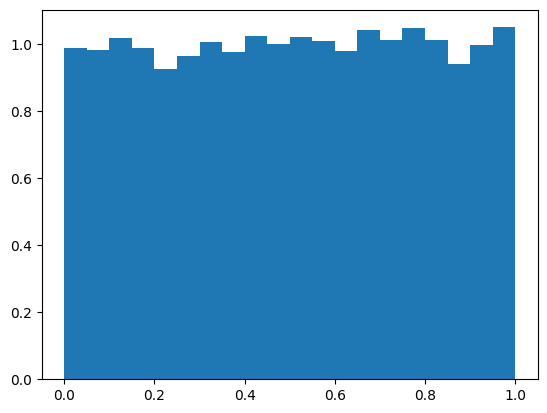

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.hist(random, 20, density=True)
plt.show()

### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [179]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1


samples1 = np.array([rng() for _ in range(1000)])
samples2 = np.array([rng_bad() for _ in range(1000)])
print(serial_test(samples1))
print(serial_test(samples2))


Power_divergenceResult(statistic=114.39999999999999, pvalue=0.1380441495447643)
Power_divergenceResult(statistic=127.60000000000001, pvalue=0.028022620756608132)


* More randomness tests - [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).
* More methods for generating a uniform value [here](https://en.wikipedia.org/wiki/List_of_random_number_generators).
* A story about dynamical systems and the transition to chaos https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

# Generating a sample from a given distribution

Suppose we have a random number generator from the segment [0, 1] (use the `np.random.rand()` function for this). How to get a sample from another distribution $F$?

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

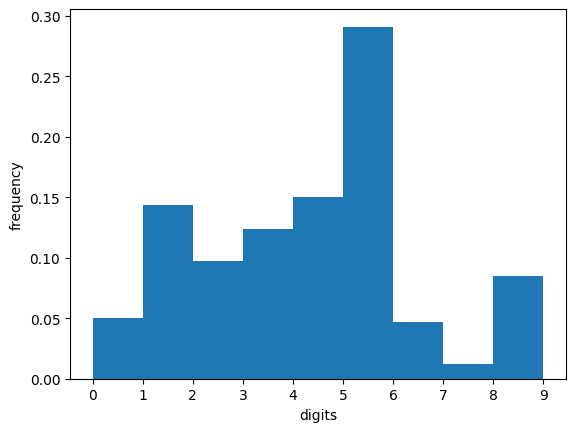

In [180]:
import numpy as np
import matplotlib.pyplot as plt

digits = np.arange(10)
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

norm_weights = weights / np.sum(weights)

sorted_indexes = np.argsort(norm_weights)[::-1]
sorted_weights = norm_weights[sorted_indexes]
sorted_digits = digits[sorted_indexes]
sample = np.random.choice(sorted_digits, size=1000, p=sorted_weights)

plt.hist(sample, bins = digits, density=True)
plt.xticks(digits)
plt.xlabel('digits')
plt.ylabel('frequency')
plt.show()

## Inverse transform method

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

$F^{-1}(\xi) = -\frac{ln(1-\xi)}{λ}$

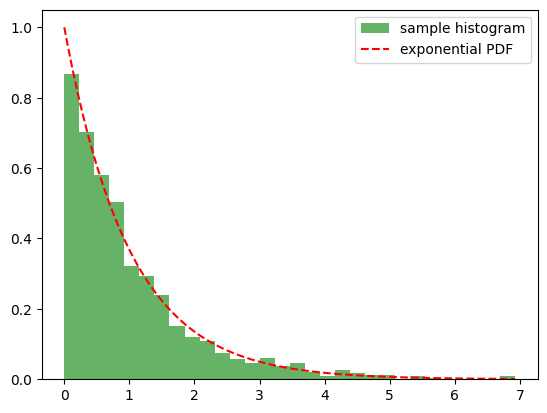

In [118]:
import numpy as np
import matplotlib.pyplot as plt
lambdaa = 1
sample_size = 1000
uniform_samples = np.random.uniform(0, 1, sample_size)
exp_samples = -np.log(1 - uniform_samples) / lambdaa

plt.hist(exp_samples,density=True, bins=30, alpha=0.6, color='g', label='sample histogram')

x = np.linspace(0, max(exp_samples), 1000)
pdf = lambdaa * np.exp(-lambdaa * x)
plt.plot(x, pdf, 'r--', label='exponential PDF')
plt.legend()
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

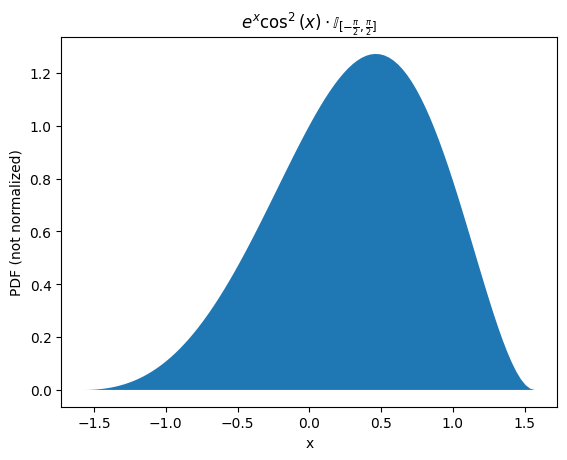

In [ ]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

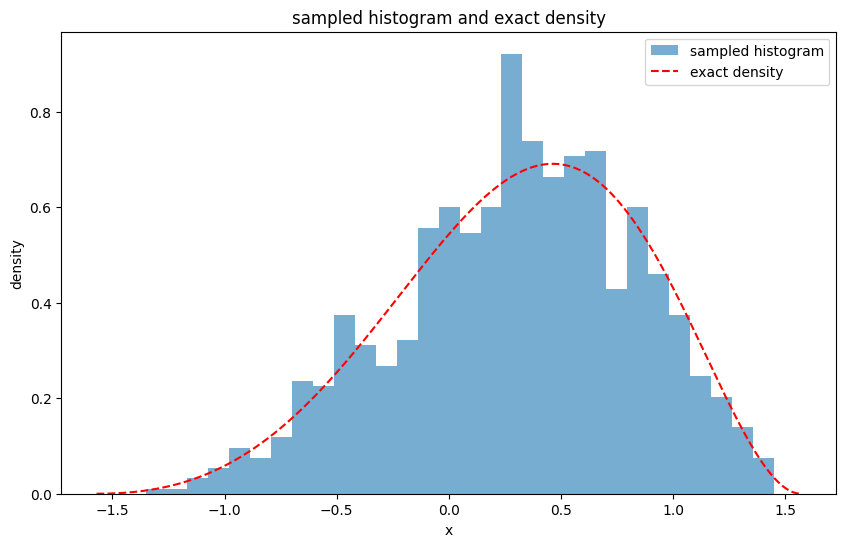

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def density(x):
  return np.exp(x) * np.cos(x) ** 2

I = quad(density, -np.pi/2, np.pi/2)[0]

def norm_density(x):
    return np.exp(x) * np.cos(x) ** 2 / I


samples = []
M = np.pi
while len(samples) < 1000:
  x = np.random.uniform(-np.pi/2, np.pi/2)
  u = np.random.uniform(0, 1)
  if u <= norm_density(x):
    samples.append(x)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, label='sampled histogram')

x = np.linspace(-np.pi/2, np.pi/2, 1000)
plt.plot(x, norm_density(x), 'r--', label='exact density')

# Add labels and title
plt.xlabel('x')
plt.ylabel('density')
plt.title('sampled histogram and exact density')
plt.legend()
plt.show()

## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

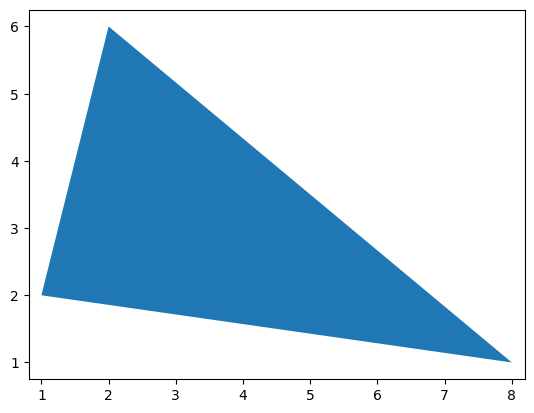

In [81]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

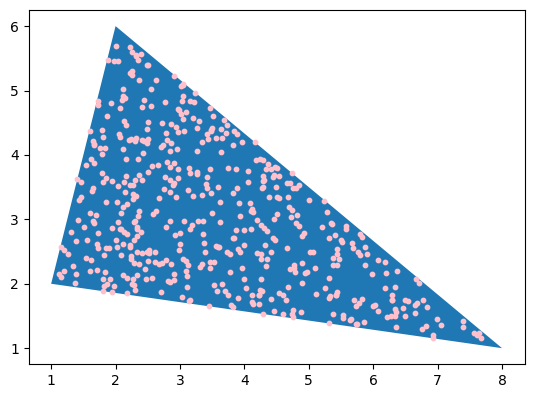

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

vert = np.array([[1, 2], [2, 6], [8, 1]])

num_points = 500

u = np.random.uniform(0, 1, num_points)
v = np.random.uniform(0, 1, num_points)

mask = u + v > 1
u[mask] = 1 - u[mask]
v[mask] = 1 - v[mask]
points = np.outer(u, vert[0]) + np.outer(v, vert[1]) + np.outer(1 - u - v, vert[2])

fig, ax = plt.subplots()
polygon = Polygon(vert, closed=True)
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=10, color='pink')
ax.set_aspect('equal')
plt.show()


### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

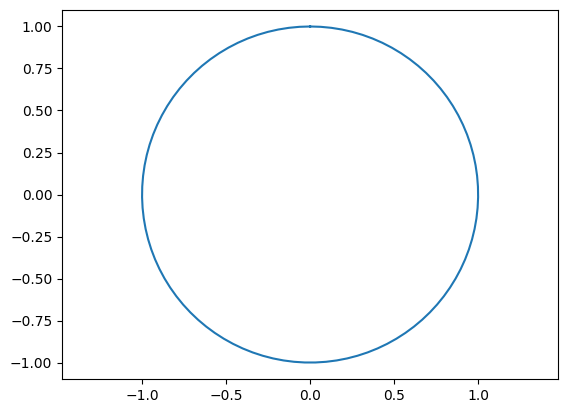

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

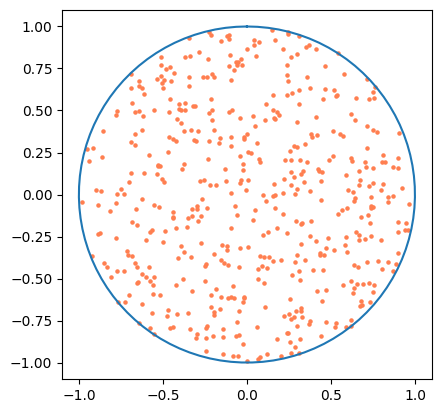

In [103]:
n_points = 500

r = np.sqrt(np.random.uniform(0, 1, n_points))
theta = np.random.uniform(0, 2 * np.pi, n_points)

x = r * np.cos(theta)
y = r * np.sin(theta)


fig, ax = plt.subplots()

plt.scatter(x, y, s=5, color='coral')
t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
ax.set_aspect('equal')
plt.show()

# Random normal generator

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

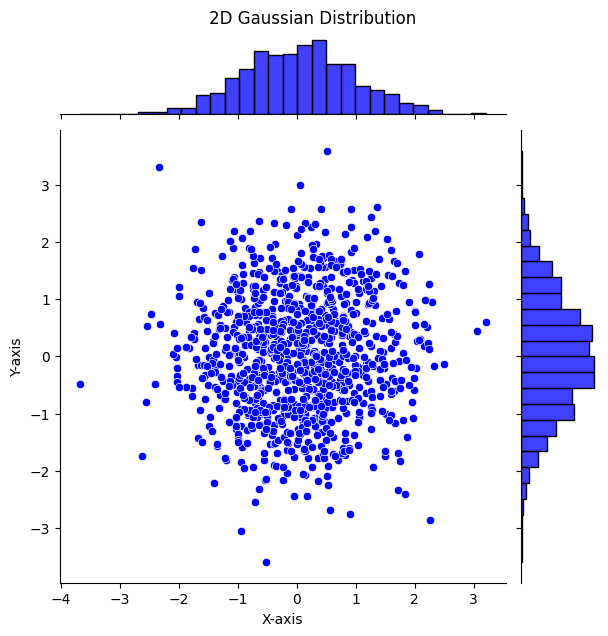

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)

joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

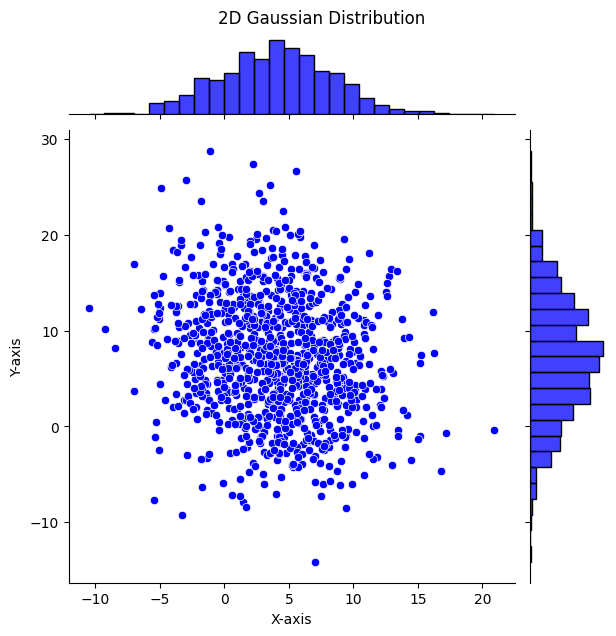

sample mean:  [4.0028903  7.18679932]
sample covariance:  [[19.20061308 -4.59186616]
 [-4.59186616 39.10018267]]


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import cholesky

n = 1000
mu = np.array([4, 7])
sigma = np.array([[20, -4], [-4, 40]])

def modified(n):
    results = []
    while len(results) < n:
        x, y = np.random.uniform(-1, 1, 2)
        s = x**2 + y**2
        accept = s < 1
        s_accept = s[accept]
        x_accept, y_accept = x[accept], y[accept]
        z0 = x_accept * np.sqrt(-2 * np.log(s_accept) / s_accept)
        z1 = y_accept * np.sqrt(-2 * np.log(s_accept) / s_accept)
        results.extend(zip(z0, z1))
    return np.array(results[:n])


L = cholesky(sigma, lower=True)
Z = modified(n)
X = mu + Z @ L.T

sns.jointplot(x=X[:, 0], y=X[:, 1], color="blue")
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X, rowvar=False)

print("sample mean: ", sample_mean)
print("sample covariance: ", sample_cov)

### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [ ]:
# Your code here

# Basic distributions
- **Uniform distribution $\operatorname{U}[a, b]$**:
$$p(x) = \frac{1}{b-a}\cdot\mathbb{I}_{x\in[a, b]}$$

- **Exponential distribution $\operatorname{Exp}(\lambda)$**:
$$p(x) = \lambda e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Normal distribution $\mathcal{N}(\mu, \sigma^2)$**:
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- **Gamma distribution $\operatorname{Gamma}(\alpha, \lambda)$**:
$$p(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Beta distribution $\operatorname{Beta}(\alpha, \beta)$**:
$$p(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}\cdot\mathbb{I}_{x\in[0, 1]}$$

- **$\chi^2$ distribution with $k$ degrees of freedom $\chi^2(k)$**:
$$p(x) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}\cdot\mathbb{I}_{x\geqslant0}$$



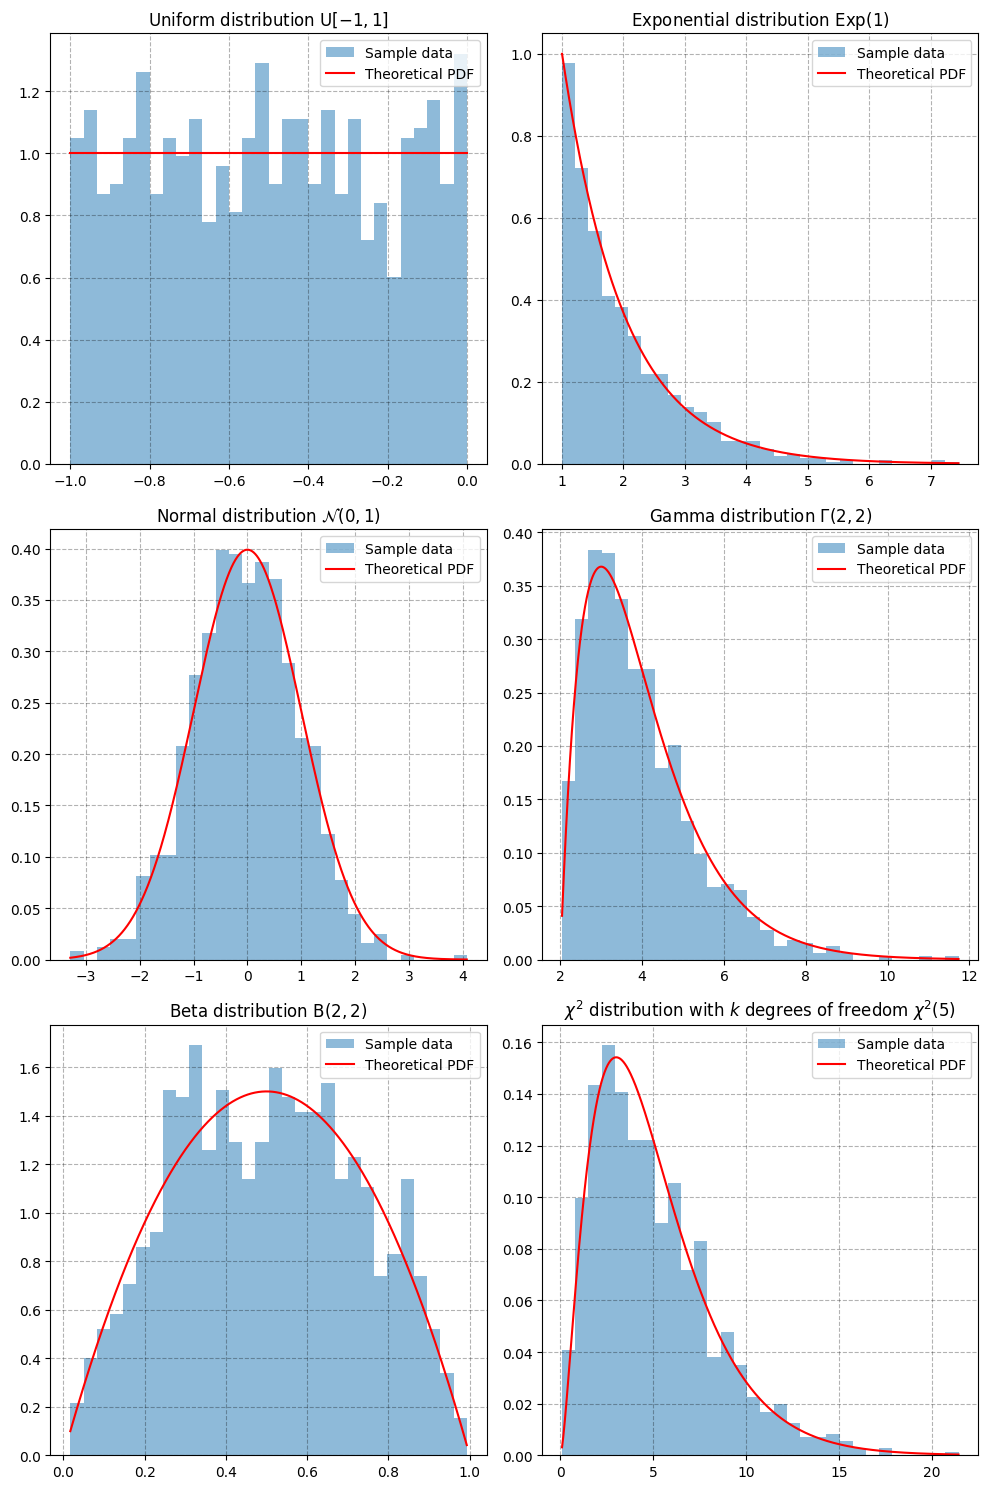

In [ ]:
# Define distributions and their parameters
distributions = [
    ("Uniform distribution $\\operatorname{U}[-1, 1]$", stats.uniform, (-1, 1)),
    ("Exponential distribution $\\operatorname{Exp}(1)$", stats.expon, (1,)),
    ("Normal distribution $\\mathcal{N}(0, 1)$", stats.norm, (0, 1)),
    ("Gamma distribution $\\Gamma(2, 2)$", stats.gamma, (2, 2)),
    ("Beta distribution $\\operatorname{B}(2, 2)$", stats.beta, (2, 2)),
    ("$\\chi^2$ distribution with $k$ degrees of freedom $\\chi^2(5)$", stats.chi2, (5,))
]

# Setup the figure and axes for a 2x3 subplot
fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Adjust figsize according to your needs
axs = axs.flatten()  # Flatten the array to easily iterate over it

for ax, (name, dist, params) in zip(axs, distributions):
    # Generate sample data
    data = dist.rvs(*params, size=1000)
    # Generate points for PDF
    x = np.linspace(min(data), max(data), 1000)
    pdf = dist.pdf(x, *params)

    # Plot histogram of sample data
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Sample data')
    # Plot theoretical PDF
    ax.plot(x, pdf, 'r-', label='Theoretical PDF')
    ax.set_title(name)
    ax.legend()
    ax.grid(linestyle='--', color='black', alpha=0.3)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()
